In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading data
data = pd.read_csv('data/results/df_train_certain.csv')

In [3]:
#creating logit model
class Logit:
    '''
    This class is a logit classifier
    X in [m, n+1]
    n: variables
    m: observations
    y in [m, 1]
    theta in [1, n+1]
    np.dot(X, theta.T)  
    ''' 
    def __init__(self, X, y, alpha=.01):
        self.X = self.add_ordinate(X)
        self.y = y
        self.theta = np.random.rand(X.shape[1]+1).reshape(1, -1)
        self.alpha = alpha # This is the learning rate
        self.loss_hist = []
        print(f'Loading data: X shape [{self.X.shape}]')
        print(f'Loading data: y shape [{self.y.shape}]')
        print(f'params shape: theta [{self.theta.shape}]')

    def add_ordinate(self, X):
        return np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
      
            
    def forward(self, X=None):
        '''
        This function implements:
        the logit pass to X. 1/(1 + e-z*theta)
        '''
        X = self.add_ordinate(X) if not X is None else self.X
        return 1/(1 + np.exp(-np.dot(X, self.theta.T)))

    def loss(self):
        '''
        Computes cross entropy loss
        '''
        p = self.forward()
        return -np.mean(self.y*np.log(p) + (1-self.y)*np.log(1-p))

    def train(self, tol=1e-2, max_iter=800):
        iters = 0
        loss = np.Inf
        #print(iters)
        while(loss > tol and iters < max_iter):
            loss = self.loss()
            #if not iters % 500:
                #print(f'loss: {loss}')
            p = self.forward().reshape(-1, 1)
            self.theta -= -self.alpha*np.mean((self.y - p)*self.X, axis=0)
            iters += 1
            self.loss_hist.append(loss)

In [4]:
#first training (test without replacement)


#taking samples with 5% and 1$
sample_5 = data.sample(frac=0.05, random_state=123454321)
sample_1 = data.sample(frac=0.01, random_state=123454321)

#eliminate column unnamed
sample_5=sample_5[['jaccard', 'res']]
sample_1=sample_1[['jaccard', 'res']]

#converting dfs to numpy arrays
data_5=sample_5.to_numpy()
data_1=sample_1.to_numpy()

#taking train data and train labels
X_5=data_5[:,0].reshape(-1,1)
X_1=data_1[:,0].reshape(-1,1)

y_5=data_5[:,1].reshape(-1,1)
y_1=data_1[:,1].reshape(-1,1)

#Instantiate Model
log5= Logit(X=X_5, y=y_5)
log1= Logit(X=X_1, y=y_1)
#train model
log5.train()
log1.train()
#storing thetas
thetas5=np.array(log5.theta)
thetas1=np.array(log1.theta)

Loading data: X shape [(29052, 2)]
Loading data: y shape [(29052, 1)]
params shape: theta [(1, 2)]
Loading data: X shape [(5810, 2)]
Loading data: y shape [(5810, 1)]
params shape: theta [(1, 2)]


In [5]:
#MODEL STABILITY
#creating 100 samples with replacement and training to store thetas

for i in range (100):
    #taking samples of samples
    sample_5 = sample_5.sample(frac=1, replace=True)
    sample_1 = sample_1.sample(frac=1, replace=True)

    #eliminate column unnamed
    sample_5=sample_5[['jaccard', 'res']]
    sample_1=sample_1[['jaccard', 'res']]

    #converting dfs to numpy arrays
    data_5=sample_5.to_numpy()
    data_1=sample_1.to_numpy()

    #taking train data and train labels
    X_5=data_5[:,0].reshape(-1,1)
    X_1=data_1[:,0].reshape(-1,1)

    y_5=data_5[:,1].reshape(-1,1)
    y_1=data_1[:,1].reshape(-1,1)

    #Instantiate Model
    log5= Logit(X=X_5, y=y_5)
    log1= Logit(X=X_1, y=y_1)
    #train
    log5.train()
    log1.train()
    #storing thetas
    thetas5=np.append(thetas5, log5.theta, axis=0)
    thetas1=np.append(thetas1, log1.theta, axis=0)

Loading data: X shape [(29052, 2)]
Loading data: y shape [(29052, 1)]
params shape: theta [(1, 2)]
Loading data: X shape [(5810, 2)]
Loading data: y shape [(5810, 1)]
params shape: theta [(1, 2)]
Loading data: X shape [(29052, 2)]
Loading data: y shape [(29052, 1)]
params shape: theta [(1, 2)]
Loading data: X shape [(5810, 2)]
Loading data: y shape [(5810, 1)]
params shape: theta [(1, 2)]
Loading data: X shape [(29052, 2)]
Loading data: y shape [(29052, 1)]
params shape: theta [(1, 2)]
Loading data: X shape [(5810, 2)]
Loading data: y shape [(5810, 1)]
params shape: theta [(1, 2)]
Loading data: X shape [(29052, 2)]
Loading data: y shape [(29052, 1)]
params shape: theta [(1, 2)]
Loading data: X shape [(5810, 2)]
Loading data: y shape [(5810, 1)]
params shape: theta [(1, 2)]
Loading data: X shape [(29052, 2)]
Loading data: y shape [(29052, 1)]
params shape: theta [(1, 2)]
Loading data: X shape [(5810, 2)]
Loading data: y shape [(5810, 1)]
params shape: theta [(1, 2)]
Loading data: X shap

Loading data: X shape [(29052, 2)]
Loading data: y shape [(29052, 1)]
params shape: theta [(1, 2)]
Loading data: X shape [(5810, 2)]
Loading data: y shape [(5810, 1)]
params shape: theta [(1, 2)]
Loading data: X shape [(29052, 2)]
Loading data: y shape [(29052, 1)]
params shape: theta [(1, 2)]
Loading data: X shape [(5810, 2)]
Loading data: y shape [(5810, 1)]
params shape: theta [(1, 2)]
Loading data: X shape [(29052, 2)]
Loading data: y shape [(29052, 1)]
params shape: theta [(1, 2)]
Loading data: X shape [(5810, 2)]
Loading data: y shape [(5810, 1)]
params shape: theta [(1, 2)]
Loading data: X shape [(29052, 2)]
Loading data: y shape [(29052, 1)]
params shape: theta [(1, 2)]
Loading data: X shape [(5810, 2)]
Loading data: y shape [(5810, 1)]
params shape: theta [(1, 2)]
Loading data: X shape [(29052, 2)]
Loading data: y shape [(29052, 1)]
params shape: theta [(1, 2)]
Loading data: X shape [(5810, 2)]
Loading data: y shape [(5810, 1)]
params shape: theta [(1, 2)]
Loading data: X shap

Loading data: X shape [(29052, 2)]
Loading data: y shape [(29052, 1)]
params shape: theta [(1, 2)]
Loading data: X shape [(5810, 2)]
Loading data: y shape [(5810, 1)]
params shape: theta [(1, 2)]
Loading data: X shape [(29052, 2)]
Loading data: y shape [(29052, 1)]
params shape: theta [(1, 2)]
Loading data: X shape [(5810, 2)]
Loading data: y shape [(5810, 1)]
params shape: theta [(1, 2)]
Loading data: X shape [(29052, 2)]
Loading data: y shape [(29052, 1)]
params shape: theta [(1, 2)]
Loading data: X shape [(5810, 2)]
Loading data: y shape [(5810, 1)]
params shape: theta [(1, 2)]
Loading data: X shape [(29052, 2)]
Loading data: y shape [(29052, 1)]
params shape: theta [(1, 2)]
Loading data: X shape [(5810, 2)]
Loading data: y shape [(5810, 1)]
params shape: theta [(1, 2)]
Loading data: X shape [(29052, 2)]
Loading data: y shape [(29052, 1)]
params shape: theta [(1, 2)]
Loading data: X shape [(5810, 2)]
Loading data: y shape [(5810, 1)]
params shape: theta [(1, 2)]
Loading data: X shap

In [8]:
#separate a from b and sorting
thetas5_b=thetas5[:,0]
thetas5_b=np.sort(thetas5_b)


thetas5_a=thetas5[:,1]
thetas5_a=np.sort(thetas5_a)

thetas1_b=thetas1[:,0]
thetas1_b=np.sort(thetas1_b)

thetas1_a=thetas1[:,1]
thetas1_a=np.sort(thetas1_a)

In [9]:
#limits from interval for thetas5
#for theta a
lim_inf5a= np.percentile(thetas5_a, 2.5)
lim_sup5a= np.percentile(thetas5_a, 97.5)
#for theta b
lim_inf5b= np.percentile(thetas5_b, 2.5)
lim_sup5b= np.percentile(thetas5_b, 97.5)

#limits from interval for thetas1
#for theta a
lim_inf1a= np.percentile(thetas1_a, 2.5)
lim_sup1a= np.percentile(thetas1_a, 97.5)
#for theta b
lim_inf1b= np.percentile(thetas1_b, 2.5)
lim_sup1b= np.percentile(thetas1_b, 97.5)

#interval
interval5A= np.array([lim_inf5a, lim_sup5a])
interval5B= np.array([lim_inf5b, lim_sup5b])
interval1A= np.array([lim_inf1a, lim_sup1a])
interval1B= np.array([lim_inf1b, lim_sup1b])

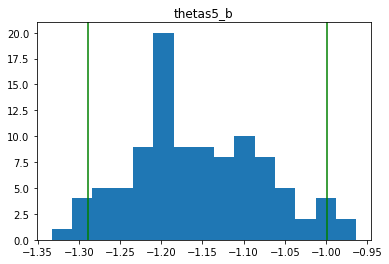

In [10]:
#plot thetas5_b
fig = plt.figure()
plt.hist(thetas5_b, bins=15)
plt.title("thetas5_b")
plt.axvline(x = lim_inf5b, color = 'g', label = 'lim inf')
plt.axvline(x = lim_sup5b, color = 'g', label = 'lim sup')
plt.show()

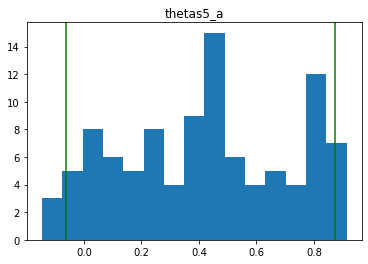

In [11]:
#plot thetas5_a
fig = plt.figure()
plt.hist(thetas5_a, bins=15)
plt.title("thetas5_a")
plt.axvline(x = lim_inf5a, color = 'g', label = 'lim inf')
plt.axvline(x = lim_sup5a, color = 'g', label = 'lim sup')
plt.show()

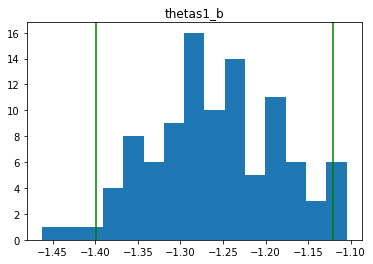

In [12]:
#plot thetas1_b
fig = plt.figure()
plt.hist(thetas1_b, bins=15)
plt.title("thetas1_b")
plt.axvline(x = lim_inf1b, color = 'g', label = 'lim inf')
plt.axvline(x = lim_sup1b, color = 'g', label = 'lim sup')
plt.show()

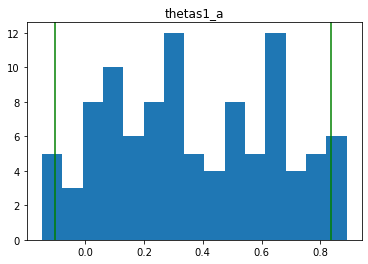

In [13]:
#plot thetas1_a
fig = plt.figure()
plt.hist(thetas1_a, bins=15)
plt.title("thetas1_a")
plt.axvline(x = lim_inf1a, color = 'g', label = 'lim inf')
plt.axvline(x = lim_sup1a, color = 'g', label = 'lim sup')
plt.show()